# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Christian Nathaniel
- **Email:** mc319d5y0357@student.devacademy.id
- **ID Dicoding:** MC319D5Y0357

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara harga produk atau biaya pengiriman dengan rating yang diberikan oleh pelanggan?
- Bagaimana hubungan antara kategori dengan rating?
- Bagaimana kecenderungan metode pembayaran credit card (cicilan) terhadap kategori produk?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install gdown
!gdown --fuzzy https://drive.google.com/file/d/1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK/view
!unzip "E-commerce-public-dataset.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK
From (redirected): https://drive.google.com/uc?id=1MsAjPM7oKtVfJL_wRp1qmCajtSG1mdcK&confirm=t&uuid=9e2582f9-c510-47e1-88e8-5fb833a36ae5
To: /content/E-commerce-public-dataset.zip
100% 44.9M/44.9M [00:00<00:00, 187MB/s]
Archive:  E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_datas

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sp

import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
customers_df = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv")
geolocation_df = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv")
order_items_df = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv")
product_category_english_df = pd.read_csv("./E-Commerce Public Dataset/product_category_name_translation.csv")
products_df = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv")
sellers_df = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv")

In [4]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [88]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
product_category_english_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data dari berbagai sumber telah dimuat ke dalam data frame masing-masing.
- Beberapa tabel memiliki hubungan langsung, seperti order_items, order_payments, orders_reviews terhadap orders
- Hubungan antar tabel ini memungkinkan analisis lebih lanjut

### Assessing Data

#### customers_df

In [13]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [14]:
print(f"Data Duplicate: {customers_df.duplicated().sum()}")
customers_df.isna().sum()

Data Duplicate: 0


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### geolocation_df

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
print(f"Data Duplicate: {geolocation_df.duplicated().sum()}")
geolocation_df.isna().sum()

Data Duplicate: 261831


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [18]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### order_item_df

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
print(f"Data Duplicate: {order_items_df.duplicated().sum()}")
order_items_df.isna().sum()

Data Duplicate: 0


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [21]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_payments_df

In [22]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [23]:
print(f"Data Duplicate: {order_payments_df.duplicated().sum()}")
order_payments_df.isna().sum()

Data Duplicate: 0


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [24]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_payments_df

In [25]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [26]:
print(f"Data Duplicate: {order_payments_df.duplicated().sum()}")
order_payments_df.isna().sum()

Data Duplicate: 0


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [27]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_reviews_df

In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
print(f"Data Duplicate: {order_reviews_df.duplicated().sum()}")
order_reviews_df.isna().sum()

Data Duplicate: 0


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [30]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### orders_df

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
print(f"Data Duplicate: {orders_df.duplicated().sum()}")
orders_df.isna().sum()

Data Duplicate: 0


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [33]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### product_category_english_df

In [34]:
product_category_english_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
print(f"Data Duplicate: {product_category_english_df.duplicated().sum()}")
product_category_english_df.isna().sum()

Data Duplicate: 0


,0
product_category_name,0
product_category_name_english,0


In [36]:
product_category_english_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### products_df

In [37]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [38]:
print(f"Data Duplicate: {products_df.duplicated().sum()}")
products_df.isna().sum()

Data Duplicate: 0


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [39]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### sellers_df

In [40]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [41]:
print(f"Data Duplicate: {sellers_df.duplicated().sum()}")
sellers_df.isna().sum()

Data Duplicate: 0


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [42]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- **Geolocation**: Ditemukan **duplikasi** data.
- **Order Review, Orders, Products**: Mengandung **missing value**.
- **order_item_id** pada Order Items: Tipe data seharusnya string/object






### Cleaning Data

#### Cleaning Geolocation

Menghapus Data Duplikat

In [43]:
geolocation_df.drop_duplicates(inplace=True)

In [44]:
geolocation_df.duplicated().sum()

0

#### Cleaning Order Review

Analisis hanya berfokus pada rating (`review_score`), sehingga missing values pada `review_comment_title` dan `review_comment_message` tidak perlu dibersihkan. Namun, kedua kolom tersebut tetap dapat dihapus untuk menyederhanakan dataset dan meningkatkan efisiensi analisis.

In [45]:
order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [46]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


#### Cleaning Orders

In [47]:
orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().sum()

,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965


Hanya order dengan status "delivered" yang digunakan, karena hanya pesanan yang telah diterima pelanggan yang dapat mencerminkan ulasan dan pola pembayaran.

In [48]:
order_status_counts = orders_df['order_status'].value_counts(normalize=True) * 100
print(order_status_counts)

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: proportion, dtype: float64


Presentase pada **delivered** adalah **97%**, sehingga hanya data dengan status ini yang dipertahankan untuk analisis.

In [49]:
orders_df = orders_df[orders_df['order_status'] == 'delivered']

In [50]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


Setelah difilter, masih terdapat beberapa missing values dalam skala kecil dan dapat dihapus.

In [51]:
orders_df.dropna(inplace=True)

In [52]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


#### Cleaning Order Items

In [53]:
order_items_df['order_item_id'] = order_items_df['order_item_id'].astype('str')

#### Cleaning Products

product_name_lenght, product_description_lenght, product_photos_qty akan dihapus karena tidak berhubungan dengan analisa

In [54]:
products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,700.0,31.0,13.0,20.0


Missing value pada product_category_name sebaiknya dihapus, krn tidak bisa dilakukan untuk analisis. Untuk Product weight, lenght, height, dan width juga dihapus karena missing valuenya dalam skala kecil.

In [55]:
products_df.dropna(inplace=True)

In [56]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


Selanjutnya kita akan melakukan merge dataframe products dan product category english agar mempermudah dalam pemahaman nama kategori

In [57]:
products_df = products_df.merge(product_category_english_df, on='product_category_name', how='left')

In [58]:
products_df["product_category_name"] = products_df["product_category_name_english"]
products_df.drop(columns=["product_category_name_english"], inplace=True)

In [59]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Duplikasi Data pada **Geolocation** telah dibersihkan
- Kolom `review_comment_title` dan `review_comment_message` pada **Order Review** dihapus karena tidak relevan untuk analisis, dan hanya berfokus kepada review_score.
- Hanya **Orders** dengan status "delivered" yang dipertahankan, karena hanya pesanan yang telah sampai ke pelanggan yang relevan untuk analisis.
- Menghapus kolom yang tidak relevan untuk analisis dan membersihkan missing value pada **Products**
- Mengubah tipe data "order_items_id" dari int menjadi object(string)
- Melakukan merge pada nama kategori menjadi **nama kategori dalam english**

## Exploratory Data Analysis (EDA)

### Explore

Kita akan melakukan Ekspolrasi variabel utama yang mendukung analisis:
1. Harga Produk
2. Rating/Ulasan
3. Metode Pembayaran
4. Kategori Produk

#### Explore Harga Produk

In [60]:
order_items_df.describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


Pada price:
- **Nilai min 0.85** sangat kecil/murah, ada kemungkinan data error
- **Nilai max 6735.0** jauh lebih tinggi dari mean 120.7 dan Q3 134.9, kemungkinan outlier

Pada freight_value:
- **Nilai Max** jauh lebih tinggi dari mean dan Q3, kemungkinan outlier

Pada order item id:
- **Nilai Max** = 21, mayoritas bernilai 1 (Q1-Q3), Ada satu pesanan membeli 21 item dalam satu transaksi?

In [61]:
order_items_df[order_items_df['price'] < 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30


Periksa Outlier

In [62]:
Q1_prices = order_items_df['price'].quantile(0.25)
Q3_prices = order_items_df['price'].quantile(0.75)
IQR_prices = Q3_prices - Q1_prices

lower_bound_prices = Q1_prices - 1.5 * IQR_prices
upper_bound_prices = Q3_prices + 1.5 * IQR_prices

filtered_prices = order_items_df[(order_items_df['price'] >= lower_bound_prices) & (order_items_df['price'] <= upper_bound_prices)]


In [63]:
Q1_freight = filtered_prices['freight_value'].quantile(0.25)
Q3_freight = filtered_prices['freight_value'].quantile(0.75)
IQR_freight = Q3_freight - Q1_freight

lower_bound_freight = Q1_freight - 1.5 * IQR_freight
upper_bound_freight = Q3_freight + 1.5 * IQR_freight

filtered_freight = filtered_prices[(filtered_prices['freight_value'] >= lower_bound_freight) & (filtered_prices['freight_value'] <= upper_bound_freight)]

In [64]:
filtered_freight.describe()

,price,freight_value
count,93975.000000,93975.000000
mean,79.191667,15.751864
std,55.980034,5.113773
min,0.850000,2.240000
25%,35.700000,12.660000
50%,60.600000,15.350000
75%,109.900000,18.370000
max,277.000000,30.410000


In [65]:
new_order_items_df = filtered_freight
new_order_items_df.describe()

,price,freight_value
count,93975.000000,93975.000000
mean,79.191667,15.751864
std,55.980034,5.113773
min,0.850000,2.240000
25%,35.700000,12.660000
50%,60.600000,15.350000
75%,109.900000,18.370000
max,277.000000,30.410000


Kemudian kita gunakan teknik **Equal-Frequency Binning** untuk mengkategorikan Harga Produk dan Biaya Pengiriman

In [66]:
num_bins = 5

new_order_items_df.loc[:, 'price_category'] = pd.qcut(
    new_order_items_df['price'],
    q=num_bins,
    labels=['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'Very Expensive']
    ).astype('category')

new_order_items_df.loc[:, 'freight_value_category'] = pd.qcut(
    new_order_items_df['freight_value'],
    q=num_bins,
    labels=['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'Very Expensive']
    ).astype('category')

<ipython-input-66-256f05315122>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_order_items_df.loc[:, 'price_category'] = pd.qcut(
<ipython-input-66-256f05315122>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_order_items_df.loc[:, 'freight_value_category'] = pd.qcut(


In [67]:
print(new_order_items_df[['price', 'price_category']])

         price  price_category
0        58.90        Moderate
1       239.90  Very Expensive
2       199.00  Very Expensive
3        12.99      Very Cheap
4       199.90  Very Expensive
...        ...             ...
112639   17.90      Very Cheap
112644  119.85       Expensive
112647   99.90       Expensive
112648   55.99        Moderate
112649   43.00           Cheap

[93975 rows x 2 columns]


In [68]:
print(new_order_items_df[['freight_value', 'freight_value_category']])


        freight_value freight_value_category
0               13.29                  Cheap
1               19.93         Very Expensive
2               17.87              Expensive
3               12.79                  Cheap
4               18.14              Expensive
...               ...                    ...
112639          22.06         Very Expensive
112644          20.03         Very Expensive
112647          16.95              Expensive
112648           8.72             Very Cheap
112649          12.79                  Cheap

[93975 rows x 2 columns]


#### Eksplorasi Rating/Ulasan

In [69]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [70]:
order_reviews_df['review_score'].value_counts().sort_index()

,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


#### Eksplorasi Metode Pembayaran

In [71]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [72]:
order_payments_df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [73]:
order_payments_df.groupby('payment_type')[['payment_installments', 'payment_value']].describe()

payment_installments                                         \
                            count      mean      std  min  25%  50%  75%   
payment_type                                                               
boleto                    19784.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
credit_card               76795.0  3.507155  2.85099  0.0  1.0  3.0  5.0   
debit_card                 1529.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
not_defined                   3.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
voucher                    5775.0  1.000000  0.00000  1.0  1.0  1.0  1.0   

                   payment_value                                          \
               max         count        mean         std    min      25%   
payment_type                                                               
boleto         1.0       19784.0  145.034435  213.581061  11.62  55.5225   
credit_card   24.0       76795.0  163.319021  222.119311   0.01  62.2100   
debit_card     1.0        1529.0  142.570170  245.793401  13.38  51.1000   
not_defined    1.0           3.0    0.000000    0.000000   0.00   0.0000   
voucher        1.0        5775.0   65.703354  115.519185   0.00  18.0350   

                                          
                 50%       75%       max  
payment_type                              
boleto         93.89  160.7625   7274.88  
credit_card   106.87  181.2100  13664.08  
debit_card     89.30  154.3200   4445.50  
not_defined     0.00    0.0000      0.00  
voucher        39.28   80.0000   3184.34

In [74]:
order_payments_df[order_payments_df['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


Hapus not_defined pada Metode Pembayaran

In [75]:
order_payments_df = order_payments_df[order_payments_df['payment_type'] != 'not_defined']

#### Eksplorasi Kategori

In [76]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340,32327,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,32340,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


#### Data Merging

In [77]:
# Merging Harga Produk dengan Rating
merged_order_items_df = new_order_items_df.merge(order_reviews_df, on='order_id', how='left')
merged_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_category,freight_value_category,review_id,review_score,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Moderate,Cheap,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Very Expensive,Very Expensive,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Very Expensive,Expensive,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Very Cheap,Cheap,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Very Expensive,Expensive,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02 00:00:00,2017-03-03 10:54:59


In [78]:
# Merging Rating Kategori Produk dengan Metode Pembayaran
merged_order_items_df = merged_order_items_df.merge(products_df, on='product_id', how='left')
merged_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_category,freight_value_category,review_id,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Moderate,Cheap,97ca439bc427b48bc1cd7177abe71365,...,2017-09-21 00:00:00,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Very Expensive,Very Expensive,7b07bacd811c4117b742569b04ce3580,...,2017-05-13 00:00:00,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Very Expensive,Expensive,0c5b33dea94867d1ac402749e5438e8b,...,2018-01-23 00:00:00,2018-01-23 16:06:31,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Very Cheap,Cheap,f4028d019cb58564807486a6aaf33817,...,2018-08-15 00:00:00,2018-08-15 16:39:01,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Very Expensive,Expensive,940144190dcba6351888cafa43f3a3a5,...,2017-03-02 00:00:00,2017-03-03 10:54:59,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [79]:
# Merging Metode Pembayaran
merged_order_items_df = merged_order_items_df.merge(order_payments_df, on='order_id', how='left')
merged_order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_category,freight_value_category,review_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Moderate,Cheap,97ca439bc427b48bc1cd7177abe71365,...,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Very Expensive,Very Expensive,7b07bacd811c4117b742569b04ce3580,...,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Very Expensive,Expensive,0c5b33dea94867d1ac402749e5438e8b,...,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Very Cheap,Cheap,f4028d019cb58564807486a6aaf33817,...,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Very Expensive,Expensive,940144190dcba6351888cafa43f3a3a5,...,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04


In [93]:
# Menyimpan Dataset
merged_order_items_df.to_csv("cleaned_ecommerce_data.csv", index=False)

#### Eksplorasi Transaksi

In [90]:
# Total transaksi yang dilakukan dan rata-rata harga produk
total_transactions = merged_order_items_df['order_id'].nunique()
average_price = merged_order_items_df['price'].mean()

summary_df = pd.DataFrame({
    'Total Transactions': [total_transactions],
    'Average Product Price': [round(average_price, 2)]
})
display(summary_df)


,Total Transactions,Average Product Price
0,82186,78.98


In [91]:
# Kategori dengan Transaksi tertinggi
top_categories = merged_order_items_df['product_category_name'].value_counts().head(10).reset_index()
top_categories.columns = ['Product Category', 'Transaction Count']
display(top_categories)

,Product Category,Transaction Count
0,bed_bath_table,11039
1,health_beauty,8340
2,sports_leisure,7860
3,furniture_decor,7432
4,computers_accessories,6982
5,housewares,6326
6,watches_gifts,4689
7,telephony,4287
8,toys,3666
9,auto,3576


In [92]:
# Metode pembayaran paling banyak digunakan
top_payment_methods = merged_order_items_df['payment_type'].value_counts().reset_index()
top_payment_methods.columns = ['Payment Method', 'Usage Count']
display(top_payment_methods)

,Payment Method,Usage Count
0,credit_card,72139
1,boleto,19680
2,voucher,5392
3,debit_card,1466


**Insight:**
- Mayoritas produk memiliki rating tinggi, namun ada beberapa kategori dengan ulasan yang lebih rendah.
- Total transaksi adalah 82186 dan rata-rata harga produk 78.98
- Kategori dengan transaksi tertinggi adalah bed_bath_table dengan 11039 transaksi
- Credit card adalah metode pembayaran yang dominan, dengan beberapa kategori lebih sering menggunakan cicilan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara harga produk atau biaya pengiriman dengan rating yang diberikan oleh pelanggan?

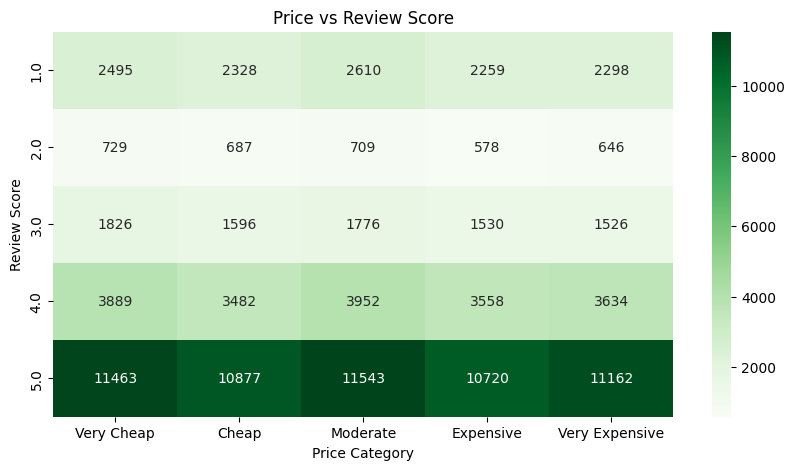

In [80]:
# Hubungan antara harga produk dengan rating


plt.figure(figsize=(10, 5))
heatmap_data = pd.pivot_table(
    merged_order_items_df,
    values="price",
    index="review_score",
    columns="price_category",
    aggfunc="count",
    observed=False)
sns.heatmap(heatmap_data, cmap="Greens", annot=True, fmt="d")
plt.title('Price vs Review Score')
plt.xlabel('Price Category')
plt.ylabel('Review Score')
plt.show()

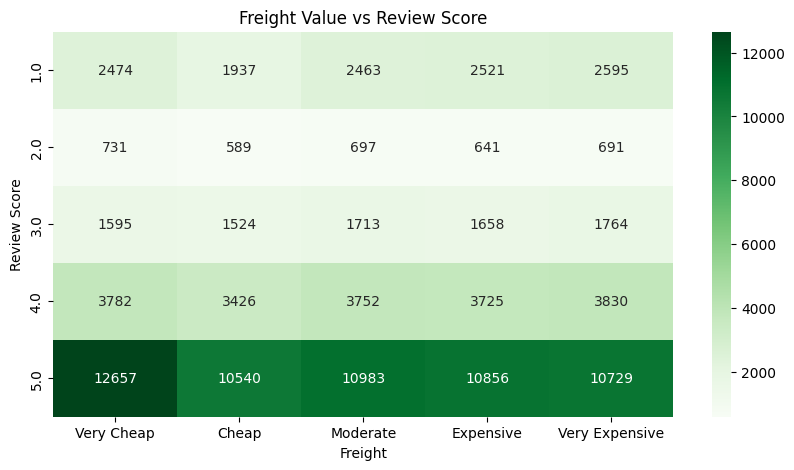

In [81]:
# Hubungan antara biaya pengiriman dengan rating

plt.figure(figsize=(10, 5))
heatmap_data_freight = pd.pivot_table(
    merged_order_items_df,
    values="freight_value",
    index="review_score",
    columns="freight_value_category",
    aggfunc="count",
    observed=False)
sns.heatmap(heatmap_data_freight, cmap="Greens", annot=True, fmt="d")
plt.title('Freight Value vs Review Score')
plt.xlabel('Freight')
plt.ylabel('Review Score')
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara harga produk atau biaya pengiriman dengan rating yang diberikan oleh pelanggan?

In [82]:
category_ratings = merged_order_items_df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False)
print(category_ratings)

product_category_name
cds_dvds_musicals                    4.615385
fashion_childrens_clothes            4.500000
books_general_interest               4.438224
flowers                              4.419355
books_technical                      4.401544
                                       ...   
office_furniture                     3.588874
fashion_male_clothing                3.543478
diapers_and_hygiene                  3.236842
furniture_mattress_and_upholstery    3.125000
security_and_services                2.500000
Name: review_score, Length: 71, dtype: float64


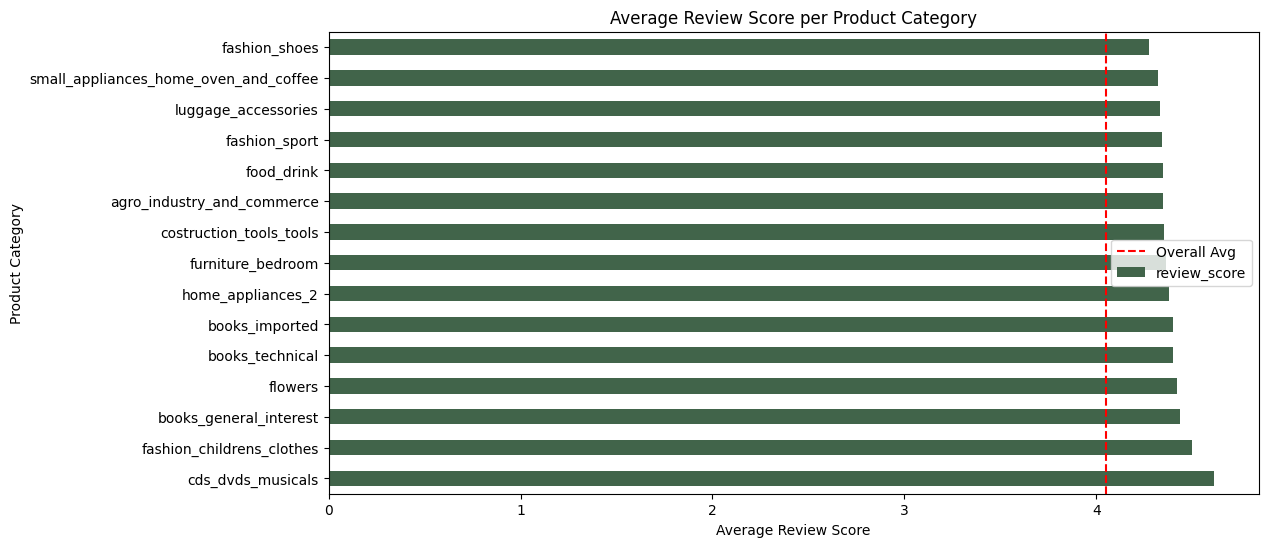

In [83]:
plt.figure(figsize=(12, 6))
category_ratings.head(15).plot(kind='barh', color='#41644A')
plt.axvline(x=merged_order_items_df['review_score'].mean(), color='r', linestyle='--', label='Overall Avg')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Average Review Score per Product Category')
plt.legend()
plt.show()

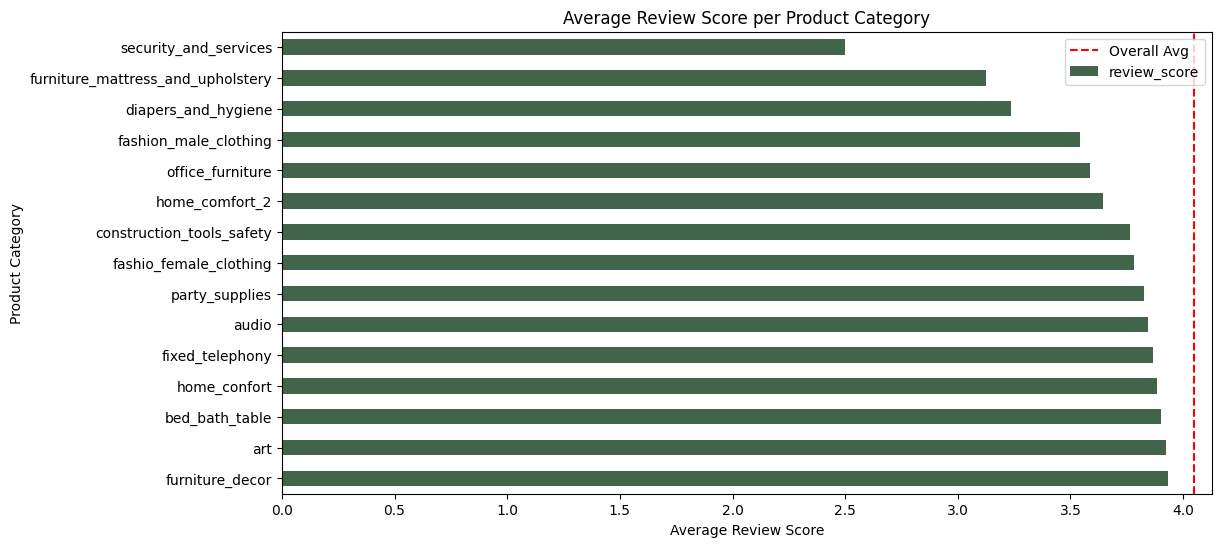

In [84]:
plt.figure(figsize=(12, 6))
category_ratings.tail(15).plot(kind='barh', color='#41644A')
plt.axvline(x=merged_order_items_df['review_score'].mean(), color='r', linestyle='--', label='Overall Avg')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.title('Average Review Score per Product Category')
plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana kecenderungan metode pembayaran credit card (cicilan) terhadap kategori produk?

In [85]:
# Filter Transaksi yang menggunakan credit card dgn cicialn (>1)

credit_card_installments = merged_order_items_df[(merged_order_items_df['payment_type'] == 'credit_card') & (merged_order_items_df['payment_installments'] > 1)]
installment_counts = credit_card_installments['product_category_name'].value_counts()
total_counts = merged_order_items_df['product_category_name'].value_counts()

installment_ratio = (installment_counts / total_counts).fillna(0) * 100

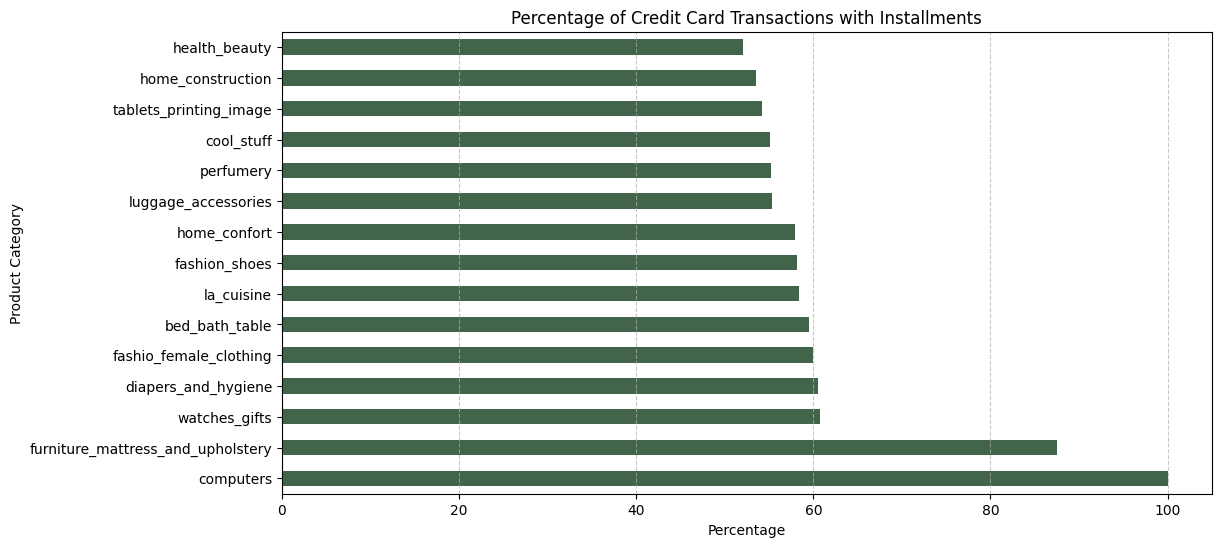

In [86]:
plt.figure(figsize=(12, 6))
installment_ratio.sort_values(ascending=False).head(15).plot(kind='barh', color='#41644A')
plt.title('Percentage of Credit Card Transactions with Installments')
plt.xlabel('Percentage')
plt.ylabel('Product Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

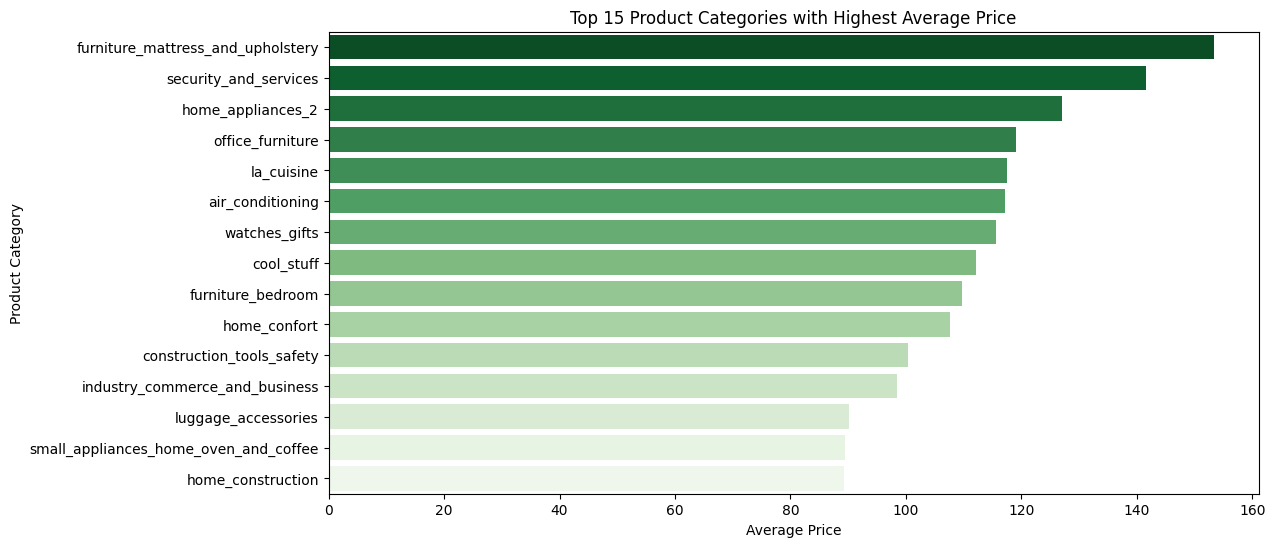

In [87]:
top_categories = (
    merged_order_items_df.groupby("product_category_name")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="Greens_r", hue=top_categories.index, legend=False)
plt.xlabel("Average Price")
plt.ylabel("Product Category")
plt.title("Top 15 Product Categories with Highest Average Price")
plt.show()


**Insight:**
- Visualisasi data membantu menjawab pertanyaan penelitian, seperti hubungan antara harga dan metode pembayaran serta faktor yang memengaruhi rating pelanggan.
- Tidak semua data divisualisasikan, hanya bagian yang paling relevan, seperti kategori dengan harga tertinggi/terendah dan metode pembayaran yang paling sering digunakan.

## Conclusion

Q1: Bagaimana hubungan antara harga produk atau biaya pengiriman dengan rating yang diberikan oleh pelanggan?
- Dari visualisasi heatmap, terlihat bahwa **mayoritas pelanggan memberikan rating tinggi (4-5)** untuk semua kategori harga produk dan biaya pengiriman. Ini menunjukkan bahwa **faktor harga dan biaya pengiriman** **tidak memiliki pengaruh signifikan** terhadap **rating** yang diberikan.
- Namun, rating rendah (1-3) tetap muncul di semua kategori, yang mengindikasikan bahwa **faktor lain seperti kualitas produk, layanan pelanggan, atau kecepatan pengiriman kemungkinan lebih mempengaruhi** kepuasan pelanggan dibanding harga dan biaya pengiriman.


Q2: Bagaimana hubungan antara harga produk atau biaya pengiriman dengan rating yang diberikan oleh pelanggan?
- Garis merah menunjukkan rata-rata rating semua kategori. Kategori di atas garis lebih disukai pelanggan, sementara yang di bawahnya kurang memuaskan.

- Kategori seperti CDs DVDs & Musicals, Fashion Children's Clothes, Books General Interest, dan Flowers memiliki rating tertinggi, menunjukkan kepuasan pelanggan yang tinggi.

- Sebaliknya, Security & Services, Furniture Mattress & Upholstery, Diapers & Hygiene, Office Furniture, dan Home Comfort mendapat rating rendah, kemungkinan karena kualitas produk, ekspektasi pelanggan, atau masalah pengiriman.

Q3: Bagaimana kecenderungan metode pembayaran credit card (cicilan) terhadap kategori produk?
Pembayaran cicilan lebih sering digunakan untuk produk bernilai tinggi atau investasi jangka panhang seperti komputer dan furniture. Sementara itu, kategori dengan harga lebih terjangkau, seperti fashion, kecantikan, dan aksesori, lebih sering dibayar langsung tanpa cicilan.